# Problem-Amaç-Kapsam

### GoalZone, Kanada'da faaliyet gösteren bir fitness kulübü zinciridir.GoalZone, 25 ve 15 olmak üzere iki kapasitede çeşitli fitness dersleri sunmaktadır.

### Bazı sınıflar her zaman tamamen doludur. Tamamen dolu sınıfların katılım oranı genellikle düşüktür.

### GoalZone, sınıflar için mevcut alan sayısını artırmak istiyor.Bunu, üyenin derse katılıp katılmayacağını tahmin ederek yapmak istiyorlar.

### Bir üyenin derse katılmayacağını tahmin edebilirlerse, ek randevu açabilirler.

#### Veri Kaggle platformundan alınmıştır.

##### Link: https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

##### Veri setini içeri aldık ve df değişkenine kopyaladık.

In [2]:
fitness = pd.read_csv("fitness_class_2212.csv")
df = fitness.copy()

### Veriye İlk Bakış

##### booking_id = Rezervasyonun benzersiz tanımlayıcısı.
##### months_as_member =  fitness kulübüne üye olunan ay sayısı, minimum 1 aydır.
##### weight = Üyenin kg cinsinden ağırlığı
##### days_before = Üyenin derse kaydolmasından önceki gün sayısı
##### day_of_week = Sınıfın(dersin) haftanın hangi günü olduğu.
##### time = Sınıfın günün hangi saatinde olduğu. Sabah ya da öğleden sonra
##### category = Fitness sınıfının kategorisi.
##### attended = Üyenin derse katılıp katılmadığı (1) veya katılmadığı (0).

#### Veri Setindeki ilk 5 satır. 

In [3]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


#### Veri Setindeki son 5 satır. 

In [4]:
df.tail()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0
1499,1500,20,94.39,8,Thu,AM,Cycling,1


### Veri Setinin Yapısal Bilgileri

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


#### Veri setinde yapmış olduğum incelemeler sonucunda sayısal değişkenlerin veri tiplerinde bir problem olmadığı ancak kategorik değişkenlerde bir takım eksiklikler olduğunu tespit ettim.

#### Öncelikle object veri tipini Categorical tipiyle değiştirelim.

In [6]:
df.time = pd.Categorical(df.time)
df.category = pd.Categorical(df.category)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1480 non-null   float64 
 3   days_before       1500 non-null   object  
 4   day_of_week       1500 non-null   object  
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 73.7+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1480 non-null   float64 
 3   days_before       1500 non-null   object  
 4   day_of_week       1500 non-null   object  
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 73.7+ KB


#### Veri setinin kaynağını tekrar kontrol ettiğimizde time değişkeninin ordinal bir kategorik değişken olarak tanımlandığını gördüm bu yüzden onu da tekrar tanımlayacağım

In [9]:
df.time.head(1)

0    PM
Name: time, dtype: category
Categories (2, object): ['AM', 'PM']

In [10]:
from pandas.api.types import CategoricalDtype

In [11]:
df.time = df.time.astype(CategoricalDtype(categories = ["AM","PM"],ordered = True))

In [12]:
df.time.head(1)

0    PM
Name: time, dtype: category
Categories (2, object): ['AM' < 'PM']

## Veri Setinin Betimlenmesi

In [13]:
df.shape

(1500, 8)

##### 1500 satır ve 8 sütünda oluşuyor 

In [14]:
df.dtypes

booking_id             int64
months_as_member       int64
weight               float64
days_before           object
day_of_week           object
time                category
category            category
attended               int64
dtype: object

##### Değişkenlerin veri tipleri 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1500.0,750.500000,433.157015,1.00,375.75,750.50,1125.25,1500.00
months_as_member,1500.0,15.628667,12.926543,1.00,8.00,12.00,19.00,148.00
weight,1480.0,82.610378,12.765859,55.41,73.49,80.76,89.52,170.52
attended,1500.0,0.302667,0.459565,0.00,0.00,0.00,1.00,1.00


#### Sayısal değişkenlerin bazı istatistiksel değerlendirilmeleri

In [16]:
#booking_id ileride sileceğimiz bir sütun randevuların benzersiz olmasını ifade ediyor. bunun dışında gözüme çarpan ilk şey weight değişkenin count'ı 1480 yani 20 kişinin 
#ağırlığı yok 

In [17]:
#months_as_member değişkenine bakınca standart sapmasının çok yüksek olduğunu görüyoruz. Burada verilerin normal dağılmadığı aşikar 

In [18]:
#weight değişkenini kontrol edince standart sapmanın çok yüksek olmadığını görüyoruz detaylı inceleme görselleştirme ile yapılacak şu an için bir problem yok gibi

In [19]:
df.describe(include = "all").T # kategorik değişenleri de ekleyerek tanımlamasını istedik

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
booking_id,1500.0,NaN,NaN,NaN,750.5,433.157015,1.0,375.75,750.5,1125.25,1500.0
months_as_member,1500.0,NaN,NaN,NaN,15.628667,12.926543,1.0,8.0,12.0,19.0,148.0
weight,1480.0,NaN,NaN,NaN,82.610378,12.765859,55.41,73.49,80.76,89.52,170.52
days_before,1500,31,10,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,1500,10,Fri,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,1500,2,AM,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1500,6,HIIT,667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attended,1500.0,NaN,NaN,NaN,0.302667,0.459565,0.0,0.0,0.0,1.0,1.0


In [20]:
#bağımlı değişkenin frekansı dikkatimi çekti boş veri olabilir. "attended"

### Eksik Değerlerin İncelenmesi

In [21]:
df.isnull().values.any() # boş değer var mı ? 

True

In [22]:
df.isnull().sum() #hangi değişkenler boş 

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [23]:
# ağırlık değişkeni 20 tane boş veri var 

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1500.0,750.500000,433.157015,1.00,375.75,750.50,1125.25,1500.00
months_as_member,1500.0,15.628667,12.926543,1.00,8.00,12.00,19.00,148.00
weight,1480.0,82.610378,12.765859,55.41,73.49,80.76,89.52,170.52
attended,1500.0,0.302667,0.459565,0.00,0.00,0.00,1.00,1.00


In [25]:
#standart sapması yüksek değil bu yüzden ortalam ile boş değerleri doldurabiliriz

In [26]:
df["weight"].fillna(df.weight.mean(), inplace = True)

In [27]:
df.isnull().sum() #hangi değişkenler boş 

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [28]:
# boş değer kalmadı 

### Kategorik Deiğişken Özetleri

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   object  
 4   day_of_week       1500 non-null   object  
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 73.7+ KB


In [30]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


### Kategorik Değişkenlerin Sınıflarına, Sınıf Sayısana ve Sınıflarının Frekanslarına Erişmek 

In [31]:
df.days_before.unique() #sınıfları

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [32]:
df["days_before"].value_counts().count() #sınıf sayı

31

In [33]:
df["days_before"].value_counts() #sınıflarının frekans sayısı 

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64

In [34]:
#veri temizlememiz gerekiyor burada "days"i sileceğiz 

In [35]:
df['days_before'] = df['days_before'].str.replace(' days', '').astype(str)

In [36]:
df["days_before"].value_counts() #sınıflarının frekans sayısı 

10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

In [37]:
# pis verileri temizledik ve doğru sınıf frekanslarına ulaştık aynısı gibi diğer kategorik değişkenlere bakalım

In [38]:
df["day_of_week"].value_counts()

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

In [39]:
df['day_of_week'] = df['day_of_week'].str[:3]

In [40]:
df["day_of_week"].value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [41]:
day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)

In [42]:
df["day_of_week"].value_counts()

5    305
4    241
1    228
7    213
6    202
2    195
3    116
Name: day_of_week, dtype: int64

In [43]:
df["time"].value_counts()

AM    1141
PM     359
Name: time, dtype: int64

In [44]:
# bir sıkıntı yok 

In [45]:
df["category"].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64

In [46]:
# "-" yerine bilinmiyor yazabiliriz ya da en yüksek frekansa sahip olana sınıfı yazalım

In [47]:
df['category']=df['category'].replace('-', 'HIIT')

In [48]:
df["category"].value_counts()

HIIT        680
Cycling     376
Strength    233
Yoga        135
Aqua         76
Name: category, dtype: int64

In [49]:
df.attended.value_counts()

0    1046
1     454
Name: attended, dtype: int64

In [50]:
# sorun yok 

## Veriyi Görselleştirme 

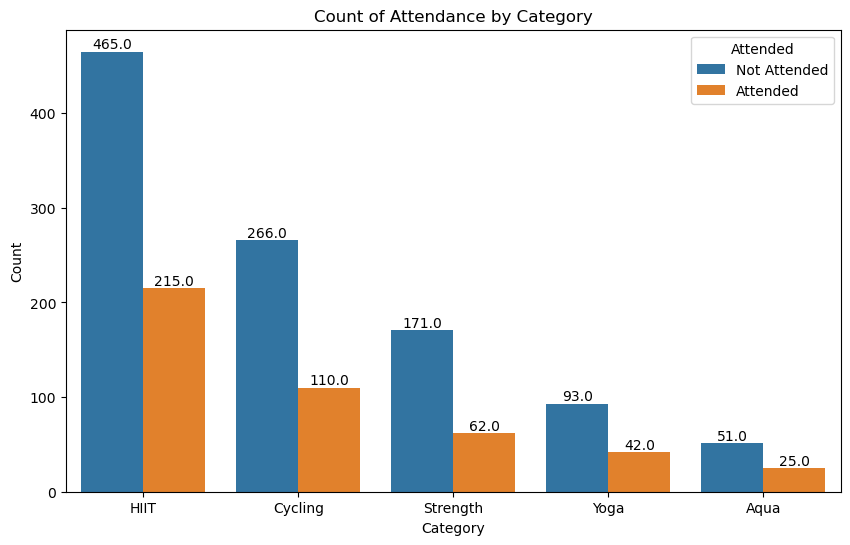

In [51]:
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)

plt.figure(figsize =(10,6))

ax = sns.countplot(data=df, x='category', hue='attended', order=category_counts['category'])


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Attendance by Category')
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
plt.show();

In [52]:
# buradan şunu çıkarabiiriz alınan randevulara büyük bir çoğunluğuna katınılmıyor.

<Figure size 1500x600 with 0 Axes>

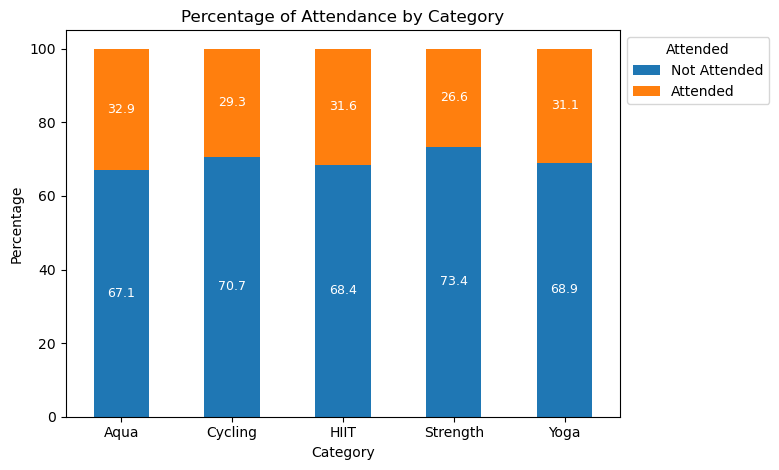

In [53]:
ct = round(pd.crosstab(df['category'], df['attended'], normalize='index') * 100,1)


plt.figure(figsize=(15, 6))
ax = ct.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Attendance by Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Attended', labels=['Not Attended', 'Attended'], bbox_to_anchor=(1, 1))


for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='white')

plt.show();

In [54]:
# görüldüğü üzere alınan randevuların yarısından fazlasına gidilmiyor 

In [55]:
# üye olunan ay sayısana göre müşterilerin dağılımı aşağıdaki gibidir.

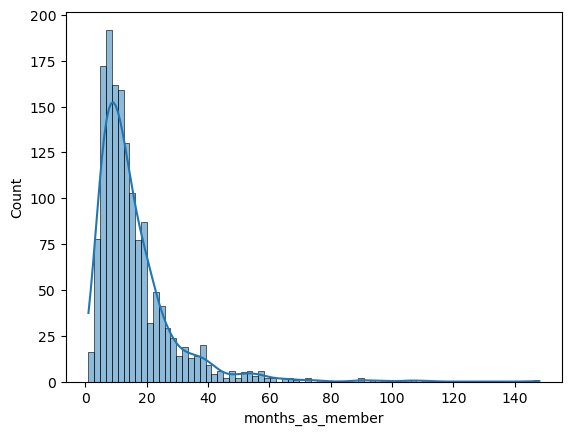

In [56]:
sns.histplot(x='months_as_member',data = df, kde = True);

In [57]:
#üyeliğin dağılımı

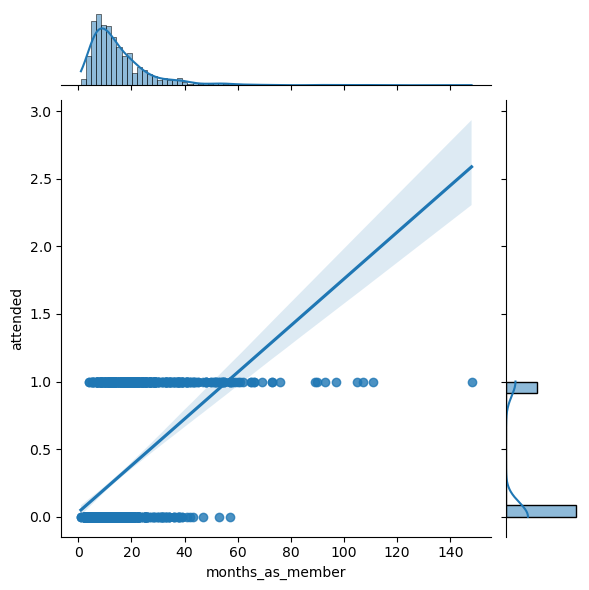

In [58]:
sns.jointplot(data=df, x='months_as_member', y='attended', kind="reg");

In [59]:
# randevuya katılım ile üye olunan ay ilişkisi

In [60]:
# eski üyelerin sadakati daha fazla gibi duruyor.

In [61]:
# hatırlatma adına verilere tekrar bir bakalım

In [62]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,3,PM,Strength,0
1,2,10,79.01,2,1,AM,HIIT,0
2,3,16,74.53,14,7,AM,Strength,0
3,4,5,86.12,10,5,AM,Cycling,0
4,5,15,69.29,8,4,AM,HIIT,0


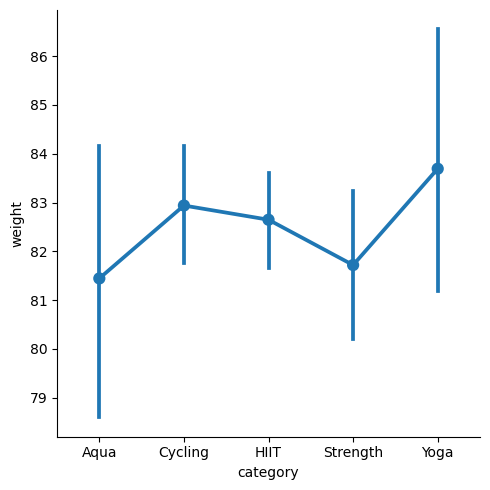

In [63]:
sns.catplot(x = "category", y = "weight", kind = "point", data=df);

In [64]:
#en farklı vücut tipelerine sahip insanlar Yoga ve Aqua sporlarında gözküyor.

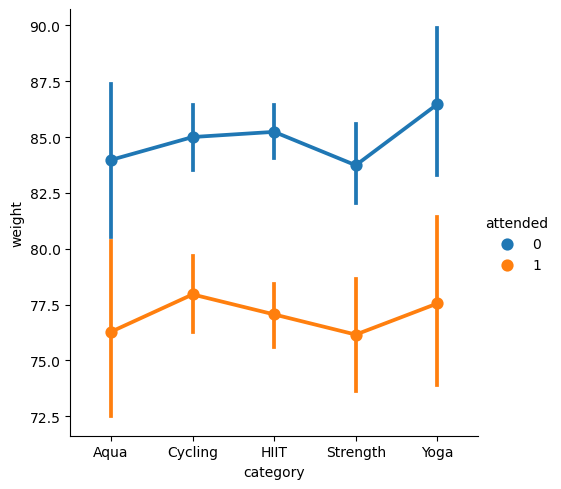

In [65]:
sns.catplot(x = "category", y = "weight", kind = "point", hue = "attended", data=df);

In [66]:
#veri setinde boy bilgisi yok ancak daha kilolu insanların (veri setindeki verilere göre) randevuya gelmeme oranı daha yüksek

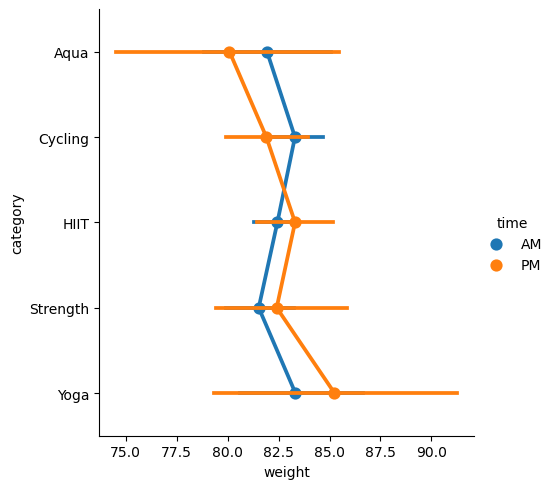

In [67]:
sns.catplot(x = "weight", y = "category", kind = "point",hue = "time", data=df);

In [68]:
#öğleden sonrası için randevu alan insanlar daha değişken kilo tipine sahip duruyor.

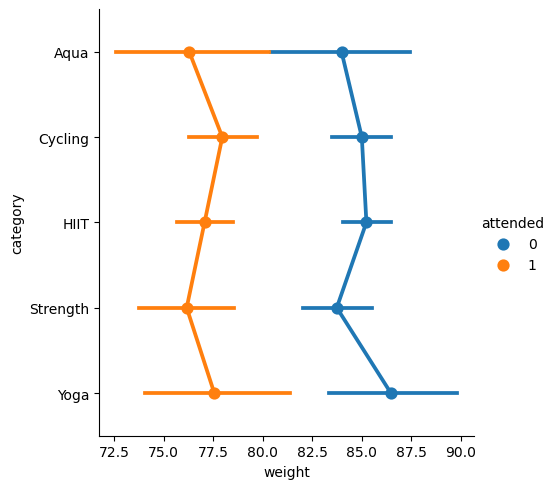

In [69]:
sns.catplot(x = "weight", y = "category", kind = "point",hue = "attended", data=df);

In [70]:
#veri setinde göre kilolu olmayan insanlar aldıkları randevuya büyük oranda gelmiş.

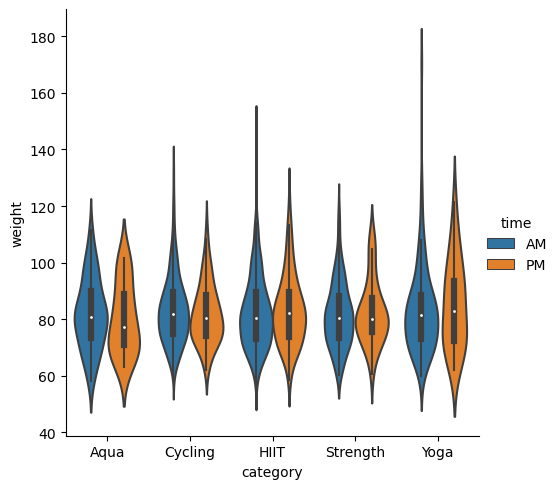

In [71]:
sns.catplot(x = "category", y = "weight", kind = "violin",hue = "time", data=df);

In [72]:
#veri setine göre kilolu insanların büyük bir kısmı öğleden önce randevu almayı tercih etmiş.

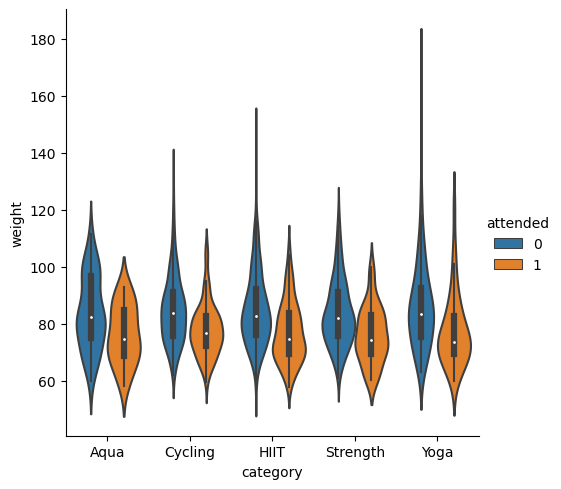

In [73]:
sns.catplot(x = "category", y = "weight", kind = "violin",hue = "attended", data=df);

In [74]:
#veri setine göre kilolu insanların büyük bir kısmı aldıkları randevuya gelmemiş.

In [75]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,3,PM,Strength,0
1,2,10,79.01,2,1,AM,HIIT,0
2,3,16,74.53,14,7,AM,Strength,0
3,4,5,86.12,10,5,AM,Cycling,0
4,5,15,69.29,8,4,AM,HIIT,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   object  
 4   day_of_week       1500 non-null   int64   
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 73.7+ KB


In [77]:
df['days_before'] = pd.to_numeric(df['days_before'], errors='coerce', downcast='integer')# grafik sayısal değişken isteği için object nesnesini int 64 yaptık.

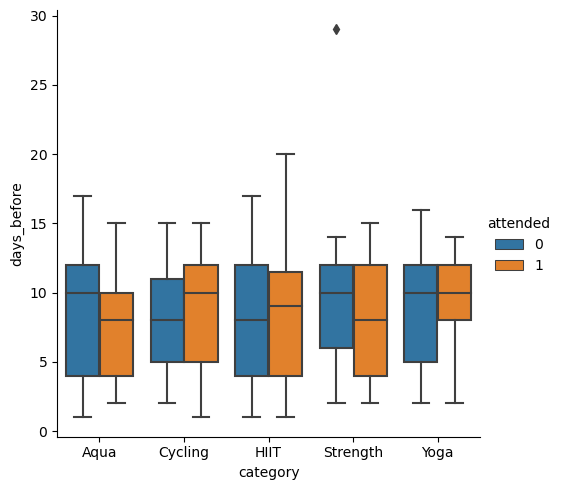

In [78]:
sns.catplot(x="category",y="days_before", hue ="attended",kind ="box" ,data=df);

In [79]:
#bu grafiği incelediğimizde randevuya gelip gelememe durumunun randevunun kaç gün önce alındığı ile ilişikisi çok yüksek değil hatta ilişkisi yok gibi duruyor.

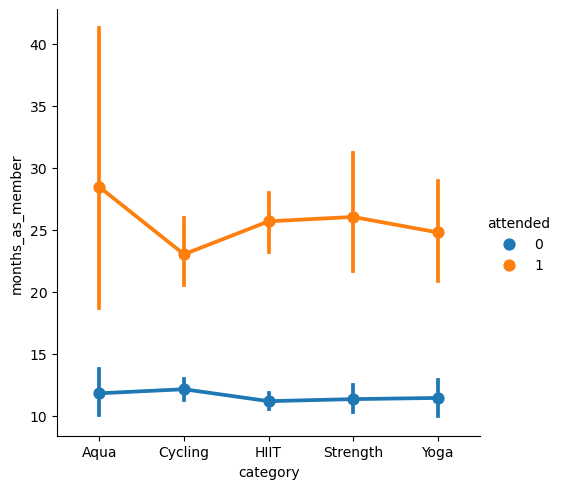

In [80]:
sns.catplot(x="category",y="months_as_member", hue ="attended",kind ="point" ,data=df);

In [81]:
#üstteki grafiğe baktığımız zaman ise eski kayıtların randevuya gelme oranı daha yüksek gözüküyor.

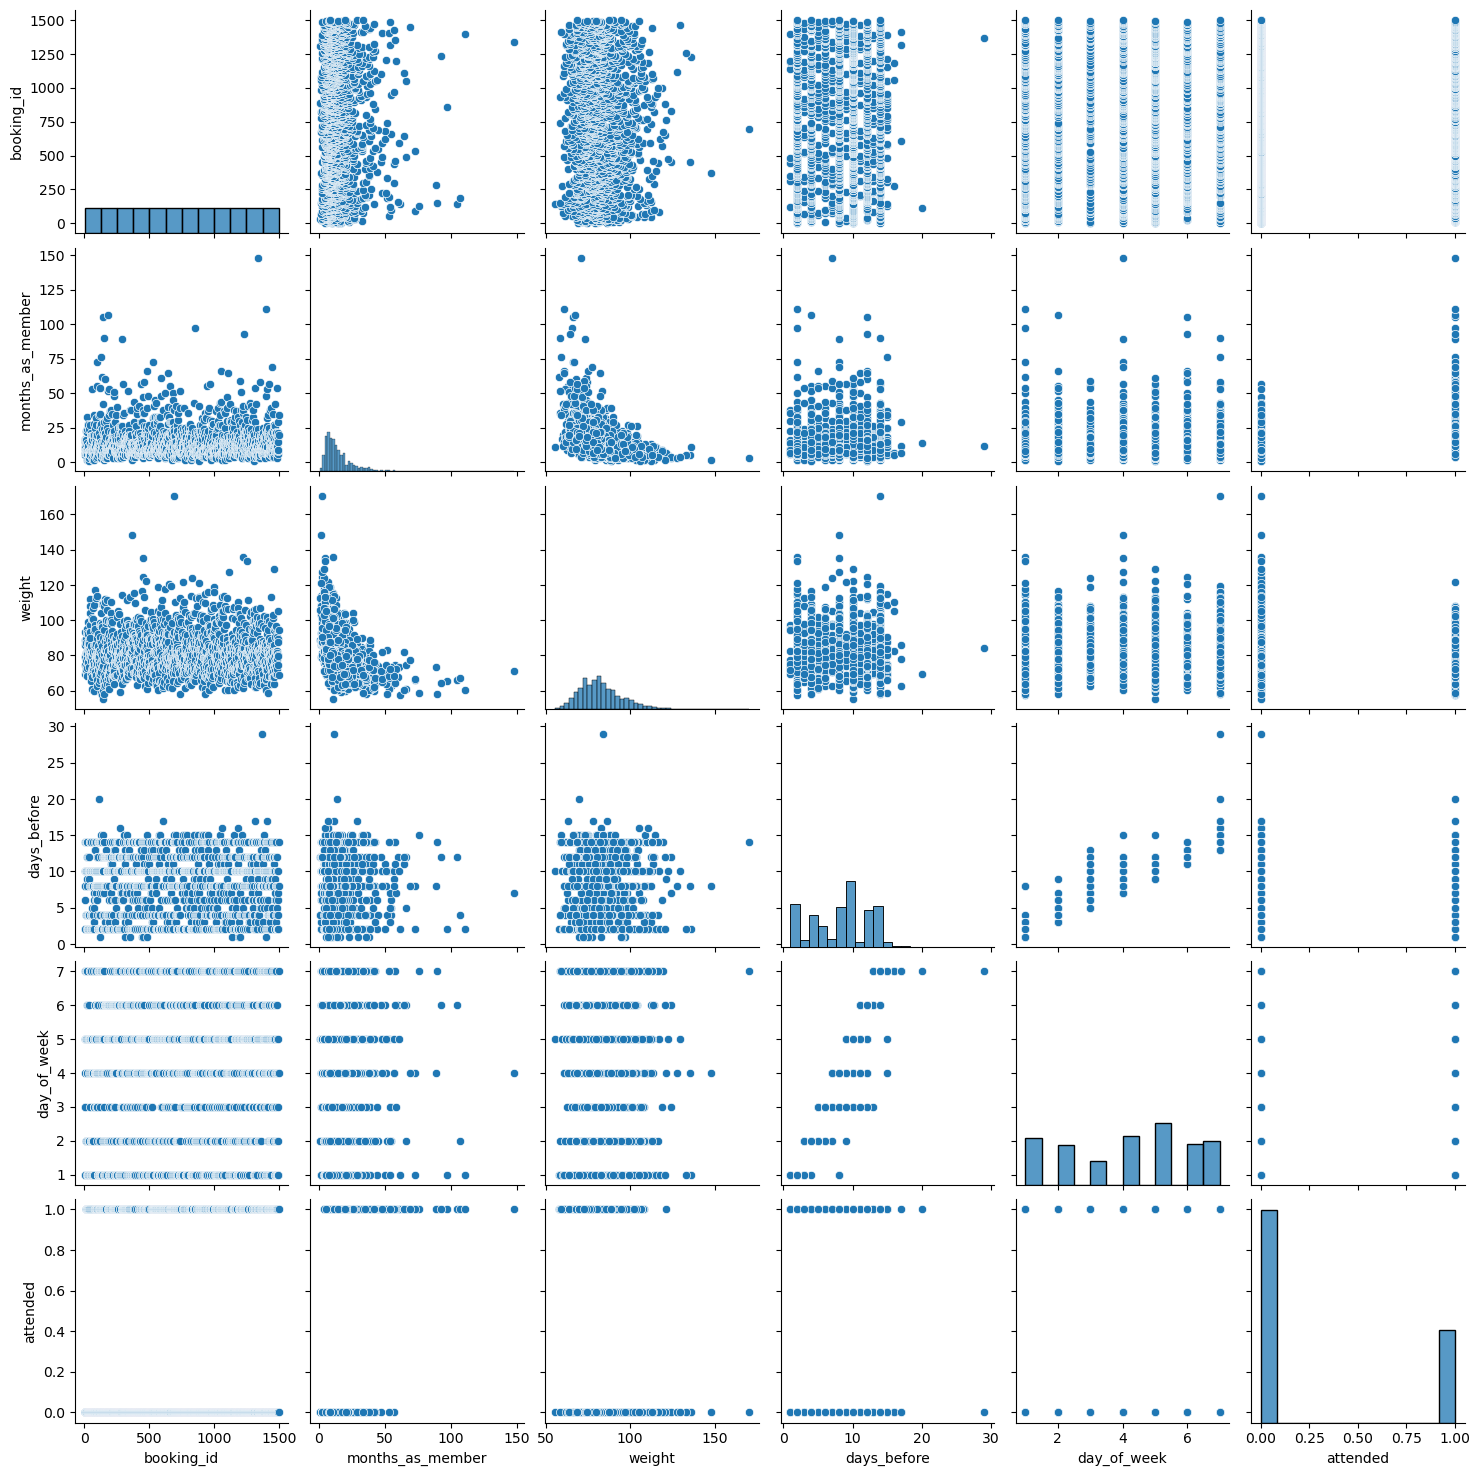

In [82]:
sns.pairplot(df);

In [83]:
df.corr()

,booking_id,months_as_member,weight,days_before,day_of_week,attended
booking_id,1.000000,0.007612,-0.009748,0.023054,0.021155,0.026693
months_as_member,0.007612,1.000000,-0.465594,0.003001,0.008920,0.485526
weight,-0.009748,-0.465594,1.000000,0.001703,-0.001703,-0.283521
days_before,0.023054,0.003001,0.001703,1.000000,0.980143,0.024068
day_of_week,0.021155,0.008920,-0.001703,0.980143,1.000000,0.035070
attended,0.026693,0.485526,-0.283521,0.024068,0.035070,1.000000


In [84]:
#dersin günü(day_of_week) ile randevunun kaç gün önce alındığı ile(days_before) arasında yüksek bir korelasyon(pozitif) var.

In [85]:
# kilo ve üye olunan ay arasında negatif bir korelasyon var.(beklendiği gibi)

In [86]:
#bunların  dışında dikkatimi çeken bir şey yok 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int8    
 4   day_of_week       1500 non-null   int64   
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(2), float64(1), int64(4), int8(1)
memory usage: 63.4 KB


In [88]:
df['attended'] = pd.to_numeric(df['attended'], errors='coerce', downcast='integer')# model sayısal değişken isteği için object nesnesini int 64 yaptık.

In [89]:
#şimdi de kategorik değişkenleri (dummy değişken) modellerin istediği gibi(istisnalar var) sayısallaştıracağız.

In [90]:
df = pd.get_dummies(df, columns=['category', 'time'],drop_first=True)

In [91]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,attended,category_Cycling,category_HIIT,category_Strength,category_Yoga,time_PM
0,1,17,79.56,8,3,0,0,0,1,0,1
1,2,10,79.01,2,1,0,0,1,0,0,0
2,3,16,74.53,14,7,0,0,0,1,0,0
3,4,5,86.12,10,5,0,1,0,0,0,0
4,5,15,69.29,8,4,0,0,1,0,0,0


In [92]:
#dummy değişken hatasına yakalanmamak için 1 sütun sildik var olan sütünlar o sütünu açıklıyor çünkü

In [93]:
X = df.drop('attended', axis=1) #bağımsız değişkenler

In [94]:
y = df[['attended']] #bağımlı değişken

In [95]:
#Veri modellere girmek için hazır hale geldi.

In [96]:
#ödevin kalan kısmını word dosyasına yapacağım